### Genpact Data Science Prodegree Project Using Python & Machine Learning                                               

### Submitted By: Sagar Gaikwad | Batch: DSP 40


### Objective of the study:
This Project is based on IBM dataset consisting of employee attrition & their retention.This analysis can discover if any particular factors or patterns that lead to attrition.

In [1]:
#Importing the packagese
#Data processing packages
import numpy as np 
import pandas as pd 

#Visualization packages
import matplotlib.pyplot as plt 
import seaborn as sns 

#Machine Learning packages
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

#Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import Employee Attrition data
df=pd.read_csv(r'attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#### Using EDA we can get data set’s shape, data types of each variables.


In [3]:
#Exploratory Data Analysis
print (df.shape)
print (df.info())
print (df.describe(include="all"))

(1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel     

#### To check unique values present in the data set for each variables and identifying ,any impure value is present   or not in the data set.


In [4]:
#Checking unique value in Dataset
for i in df.columns:
    print({i:df[i].unique()})

{'Age': array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60], dtype=int64)}
{'Attrition': array(['Yes', 'No'], dtype=object)}
{'BusinessTravel': array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)}
{'DailyRate': array([1102,  279, 1373, 1392,  591, 1005, 1324, 1358,  216, 1299,  809,
        153,  670, 1346,  103, 1389,  334, 1123, 1219,  371,  673, 1218,
        419,  391,  699, 1282, 1125,  691,  477,  705,  924, 1459,  125,
        895,  813, 1273,  869,  890,  852, 1141,  464, 1240, 1357,  994,
        721, 1360, 1065,  408, 1211, 1229,  626, 1434, 1488, 1097, 1443,
        515,  853, 1142,  655, 1115,  427,  653,  989, 1435, 1223,  836,
       1195, 1339,  664,  318, 1225, 1328, 1082,  548,  132,  746,  776,
        193,  397,  945, 1214,  111,  573, 1153, 1400,  541,  432,  288,
        669,  530,  632, 1334,  638, 1093,

#### verify the missing values present in the data set with the help of isnull().sum() function

In [5]:
pd.set_option("display.max_rows",None)
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

#### The Fields having common output values or Standard Deviation is zero such columns does not add value. Hence they can be remove using function - drop ( [“ ”] ,axis =1 )

In [6]:
df['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

### Distribution of employee attrition in company

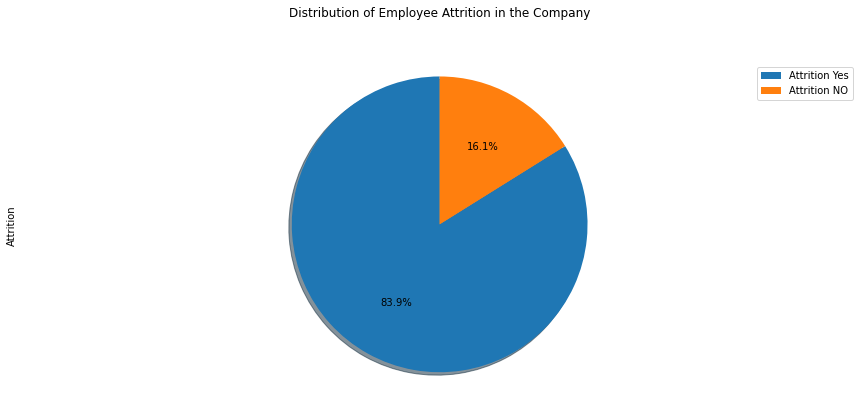

In [7]:
labels='Attrition Yes','Attrition NO'
df['Attrition'].astype(str).value_counts().plot(kind='pie',
                                               figsize=(15,6),
                                               autopct='%1.1f%%',
                                               startangle=90,
                                               shadow=True,
                                               labels=None)
plt.title('Distribution of Employee Attrition in the Company',y=1.12)
plt.axis('equal')
# add Legend
plt.legend(labels=labels,loc='upper right')
#show plot
plt.show()

Observation:-From 1470 employees, 16% of the them left there job & 84% of the employees continued there job at the company.

Analysis of Rating Features

- JobSatisfaction
- Environment Satisfaction
- Relationship Satisfaction
- Job Involvement
- Worklife Balance
- Performance Rating

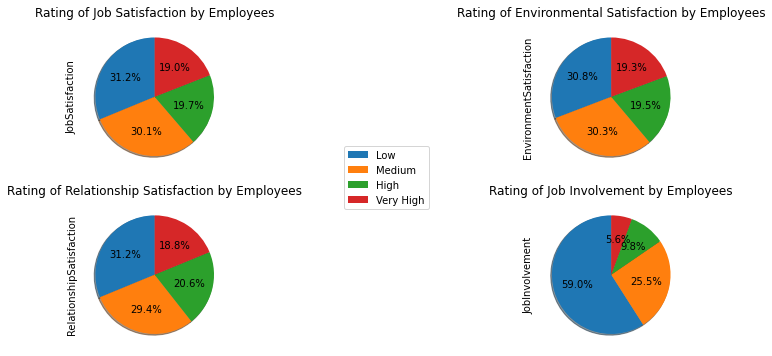

In [10]:
fig = plt.figure() 

ax1 = fig.add_subplot(221) 
ax2 = fig.add_subplot(222)  
ax3 = fig.add_subplot(223) 
ax4 = fig.add_subplot(224)  

labels = 'Low','Medium','High','Very High'

df['JobSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax1) # add to subplot 2
ax1.set_title ('Rating of Job Satisfaction by Employees')
fig.legend(labels=labels,loc='center')

df['EnvironmentSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax2) 
ax2.set_title('Rating of Environmental Satisfaction by Employees')

df['RelationshipSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax3)
ax3.set_title('Rating of Relationship Satisfaction by Employees')

df['JobInvolvement'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax4) 
ax4.set_title('Rating of Job Involvement by Employees')

plt.show()

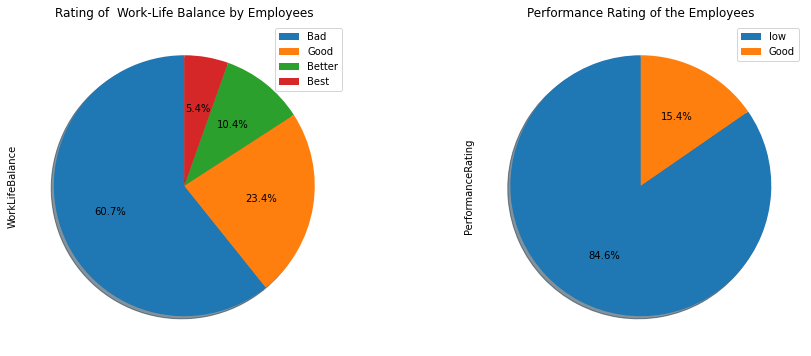

In [11]:
fig2 =plt.figure()

ax5=fig2.add_subplot(121)
ax6=fig2.add_subplot(122)

labels_list1='Bad','Good','Better','Best'
labels_list2='low','Good','Excellent','Outstanding'

df['WorkLifeBalance'].astype(str).value_counts().plot(kind='pie',
                                                     figsize=(15,6),
                                                     autopct='%1.1f%%',
                                                     startangle=90,
                                                     shadow=True,
                                                     labels=None,ax=ax5)# add to subplot 2
ax5.set_title('Rating of  Work-Life Balance by Employees')
ax5.legend(labels_list1,loc='upper right')

df['PerformanceRating'].astype(str).value_counts().plot(kind='pie',
                                                       figsize=(15,6),
                                                       autopct="%1.1f%%",
                                                       startangle=90,
                                                       shadow=True,
                                                       labels=None,ax=ax6)
ax6.set_title('Performance Rating of the Employees')
ax6.legend(labels=labels_list2,loc='upper right')

plt.show()

Observation:-
- Almost 60% of the Employees have rated their work-life Balanced as Bad
- Almost 85% of the Employees have now performing rating

#### Attrition field has values Yes/No however for Machine learning algorithms we need numeric values.Hence translating Yes/No to binary 1/0 using lambda function.It can take any number of arguments ,but can only have one expression.

In [8]:
#A lambda function can take any number of arguments, but can only have one expression.
df['Attrition']=df['Attrition'].apply(lambda x : 1 if x=='Yes' else 0)

#### For further processing of the data we need to convert categorical values into Numerical values , using pd.get_dummies() function. It can be seen from the difference in the output of data.head() before and after the conversion that now all the fields have numerical values.


In [9]:
#This function is used to convert Categorical values to Numerical values
df=pd.get_dummies(df)

In [10]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,1,2,94,3,2,...,0,0,0,1,0,0,0,1,0,1
1,49,0,279,8,1,2,3,61,2,2,...,0,0,1,0,0,0,1,0,1,0
2,37,1,1373,2,2,4,4,92,2,1,...,0,0,0,0,0,0,0,1,0,1
3,33,0,1392,3,4,5,4,56,3,1,...,0,0,1,0,0,0,1,0,0,1
4,27,0,591,2,1,7,1,40,3,1,...,0,0,0,0,0,0,1,0,1,0


In [11]:
#Separating Feature and Target matrices
X = df.drop(['Attrition'], axis=1)
Y=df['Attrition']

#### Feature scaling is a method used to standardize the range of independent variables or features of data.Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. 

In [12]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = scale.fit_transform(X)

In [13]:
# Split the data into Training set and Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size =0.2,random_state=42)

In [36]:
#Function to Train and Test Machine Learning Model

def train_test_ml_model(X_train,Y_train,X_test,Model):
    model.fit(X_train,Y_train) #Train the Model
    Y_pred = model.predict(X_test) #Use the Model for prediction
    from sklearn.metrics import classification_report
    print(classification_report(Y_test,Y_pred)) 

    # Test the Model
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(Y_test,Y_pred)
    accuracy = round(100*np.trace(cm)/np.sum(cm),1) #

    #Plot/Display the results
    cm_plot(cm,Model)
    print('Accuracy of the Model' ,Model, str(accuracy)+'%')

In [39]:
#Function to plot Confusion Matrix
def cm_plot(cm,Model):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('Comparison of Prediction Result for '+ Model)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       255
           1       0.58      0.46      0.51        39

    accuracy                           0.88       294
   macro avg       0.75      0.71      0.72       294
weighted avg       0.88      0.88      0.88       294



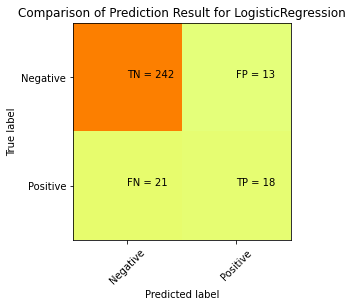

Accuracy of the Model LogisticRegression 88.4%


In [40]:
                # LOGOSTIC REGRESSION #
    
from sklearn.linear_model import LogisticRegression 
Model = "LogisticRegression"
model=LogisticRegression()

train_test_ml_model(X_train,Y_train,X_test,Model)

#### As checked in LogisticRegression Model, type 2 error is high. To reduce the same applied Oversampling Technique.


In [41]:
def resamplingDataPrep(X_train, Y_train, target_var): 
    # concatenate our training data back together
    resampling = X_train.copy()
    resampling[target_var] = Y_train.values
    
    # separate minority and majority classes
    majority_class = resampling[resampling[target_var]==0]
    minority_class = resampling[resampling[target_var]==1]
    
    # Get a class count to understand the class imbalance.
    print('majority_class: '+ str(len(majority_class)))
    print('minority_class: '+ str(len(minority_class)))
    return majority_class, minority_class

In [42]:
def upsample_SMOTE(X_train, Y_train, ratio=1.0):
    
    """Upsamples minority class using SMOTE.
    Ratio argument is the percentage of the upsampled minority class in relation
    to the majority class. Default is 1.0
    """
    sm = SMOTE(random_state=40, sampling_strategy=ratio)
    X_train_sm, Y_train_sm = sm.fit_resample(X_train, Y_train)
    #print(len(X_train_sm), len(Y_train_sm))
    #return X_train_sm, Y_train_sm

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       255
           1       0.58      0.46      0.51        39

    accuracy                           0.88       294
   macro avg       0.75      0.71      0.72       294
weighted avg       0.88      0.88      0.88       294



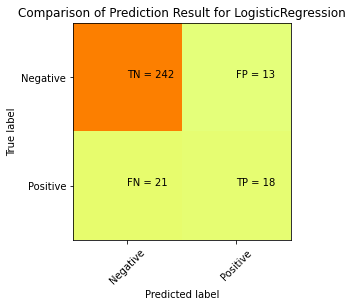

Accuracy of the Model LogisticRegression 88.4%


In [43]:
                # LOGOSTIC REGRESSION #
    
from sklearn.linear_model import LogisticRegression 
Model = "LogisticRegression"
model=LogisticRegression()

train_test_ml_model(X_train,Y_train,X_test,Model)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       255
           1       0.77      0.26      0.38        39

    accuracy                           0.89       294
   macro avg       0.83      0.62      0.66       294
weighted avg       0.88      0.89      0.87       294



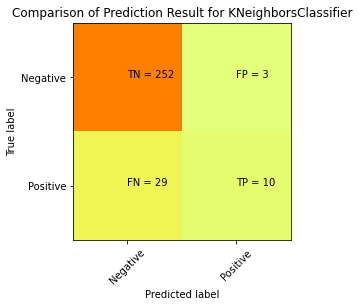

Accuracy of the Model KNeighborsClassifier 89.1%


In [44]:
                    # KNN #
    
from sklearn.neighbors import KNeighborsClassifier 
Model = "KNeighborsClassifier"
model=KNeighborsClassifier()

train_test_ml_model(X_train,Y_train,X_test,Model)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       255
           1       0.38      0.38      0.38        39

    accuracy                           0.84       294
   macro avg       0.65      0.65      0.65       294
weighted avg       0.84      0.84      0.84       294



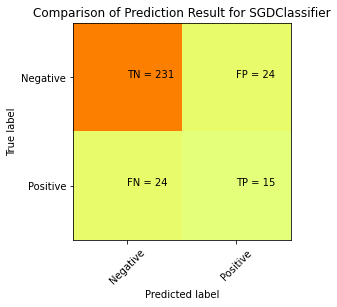

Accuracy of the Model SGDClassifier 83.7%


In [45]:
               # SGD #
    
from sklearn.linear_model import SGDClassifier
Model = "SGDClassifier"
model=SGDClassifier()


train_test_ml_model(X_train,Y_train,X_test,Model)

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       255
           1       0.17      0.18      0.17        39

    accuracy                           0.77       294
   macro avg       0.52      0.52      0.52       294
weighted avg       0.78      0.77      0.78       294



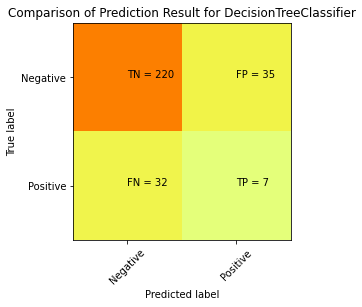

Accuracy of the Model DecisionTreeClassifier 77.2%


In [46]:
                   # DECISION TREE #

from sklearn.tree import DecisionTreeClassifier 
Model = "DecisionTreeClassifier"
model=DecisionTreeClassifier()

train_test_ml_model(X_train,Y_train,X_test,Model)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.67      0.10      0.18        39

    accuracy                           0.87       294
   macro avg       0.77      0.55      0.55       294
weighted avg       0.85      0.87      0.83       294



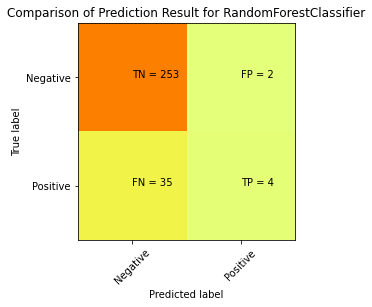

Accuracy of the Model RandomForestClassifier 87.4%


In [47]:
                   # RANDOM FOREST #

from sklearn.ensemble import RandomForestClassifier
Model = "RandomForestClassifier"
model=RandomForestClassifier()

train_test_ml_model(X_train,Y_train,X_test,Model)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       255
           1       0.89      0.21      0.33        39

    accuracy                           0.89       294
   macro avg       0.89      0.60      0.64       294
weighted avg       0.89      0.89      0.86       294



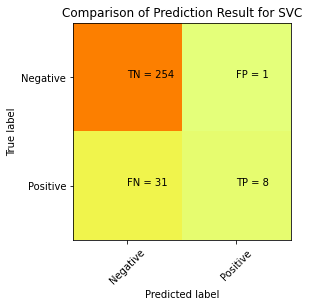

Accuracy of the Model SVC 89.1%


In [48]:
                 # SUPPORT VECTOR MACHINE #
from sklearn.svm import SVC 
Model = "SVC"
model=SVC() #Create the Model

train_test_ml_model(X_train,Y_train,X_test,Model)

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       255
           1       0.35      0.38      0.37        39

    accuracy                           0.82       294
   macro avg       0.63      0.64      0.63       294
weighted avg       0.83      0.82      0.83       294



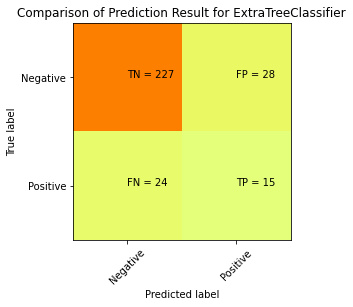

Accuracy of the Model ExtraTreeClassifier 82.3%


In [49]:
               # EXTRA TREE CLASSIFIER #

from sklearn.tree import ExtraTreeClassifier
Model = "ExtraTreeClassifier"
model=ExtraTreeClassifier()

train_test_ml_model(X_train,Y_train,X_test,Model)

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       255
           1       0.46      0.31      0.37        39

    accuracy                           0.86       294
   macro avg       0.68      0.63      0.65       294
weighted avg       0.84      0.86      0.85       294



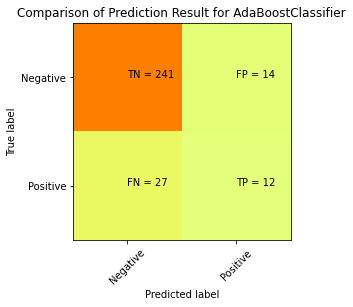

Accuracy of the Model AdaBoostClassifier 86.1%


In [50]:
          # AdaBOOST CLASSIFIER #

from sklearn.ensemble import AdaBoostClassifier
Model = "AdaBoostClassifier"
model=AdaBoostClassifier()

train_test_ml_model(X_train,Y_train,X_test,Model)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       255
           1       0.67      0.21      0.31        39

    accuracy                           0.88       294
   macro avg       0.78      0.59      0.62       294
weighted avg       0.86      0.88      0.85       294



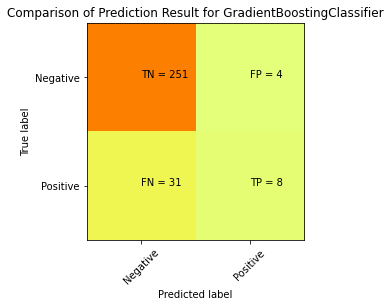

Accuracy of the Model GradientBoostingClassifier 88.1%


In [51]:
          # Gradient Boosting Classifier #
    
from sklearn.ensemble import GradientBoostingClassifier
Model = "GradientBoostingClassifier"
model=GradientBoostingClassifier()

train_test_ml_model(X_train,Y_train,X_test,Model)

### Conclusion:-

-Performed a set of Classification Algorithms to find the best fit model for our Data.

-Logistic Regression:89.1%

-KNN Model:85.3%

-SGD Model:83.2%

-Decision Tree:78.9%

-Random forest:86.8%

-SVM Model:87.3%

-XtraTreeClassifier:78.3%

-AdaboostClassifier:87.5 %

-Gradient Boosting Classifier:87.8%

We conclude that Logistic Regression is the best fit model considering its accuracy is better than other predicted Module.